# CNN Project CIFAR - 10

##Problem Statement: Build a convolutional neural network (CNN) to classify images from the CIFAR-10 dataset. The CIFAR-10 dataset consists of 60,000 32x32 color images of 10 classes, such as airplanes, cars, birds, cats, deer, dogs, frogs, horses, ships, and trucks.

In [1]:
from keras.datasets import cifar10

In [2]:
(xtrain, ytrain), (xtest, ytest) = cifar10.load_data()

170498071/170498071 [==============================] - 4s 0us/step


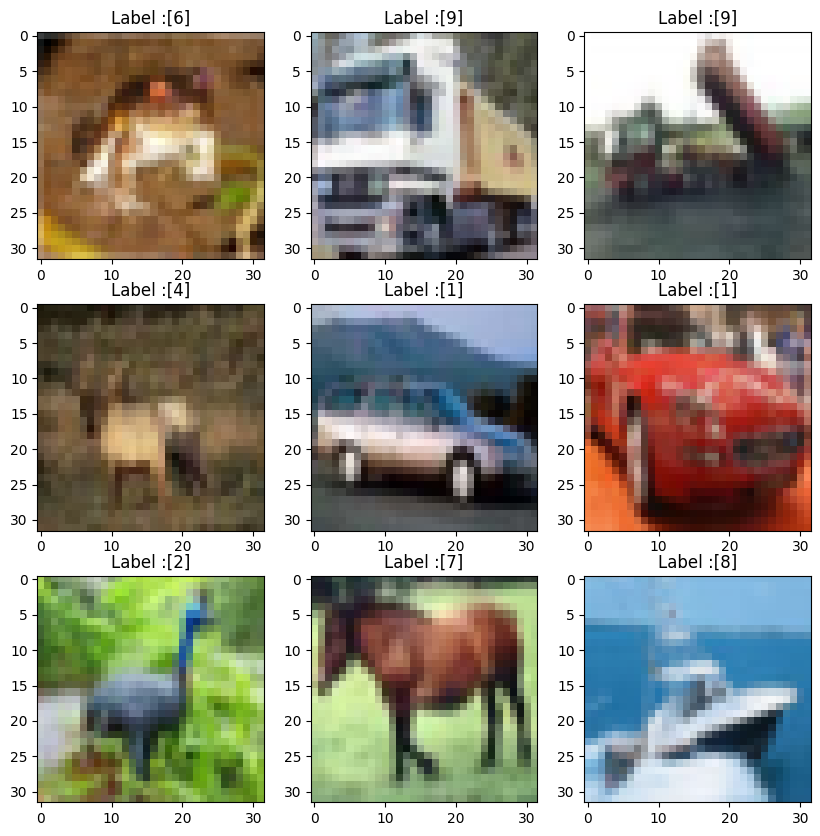

In [3]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
for i in range(9):
  plt.subplot(3,3,i+1)
  plt.imshow(xtrain[i])
  plt.title(f'Label :{ytrain[i]}')
plt.show()

In [4]:
xtrain.shape

(50000, 32, 32, 3)

In [5]:
xtest.shape

(10000, 32, 32, 3)

# Preprocessing the data

In [6]:
xtrain[1]

array([[[154, 177, 187],
        [126, 137, 136],
        [105, 104,  95],
        ...,
        [ 91,  95,  71],
        [ 87,  90,  71],
        [ 79,  81,  70]],

       [[140, 160, 169],
        [145, 153, 154],
        [125, 125, 118],
        ...,
        [ 96,  99,  78],
        [ 77,  80,  62],
        [ 71,  73,  61]],

       [[140, 155, 164],
        [139, 146, 149],
        [115, 115, 112],
        ...,
        [ 79,  82,  64],
        [ 68,  70,  55],
        [ 67,  69,  55]],

       ...,

       [[175, 167, 166],
        [156, 154, 160],
        [154, 160, 170],
        ...,
        [ 42,  34,  36],
        [ 61,  53,  57],
        [ 93,  83,  91]],

       [[165, 154, 128],
        [156, 152, 130],
        [159, 161, 142],
        ...,
        [103,  93,  96],
        [123, 114, 120],
        [131, 121, 131]],

       [[163, 148, 120],
        [158, 148, 122],
        [163, 156, 133],
        ...,
        [143, 133, 139],
        [143, 134, 142],
        [143, 133, 144]]

In [7]:
xtrain_scl = xtrain/255
xtest_scl = xtest/255

In [8]:
# Convert ytrain and ytest to categorical

from keras.utils import to_categorical
ytrain_cat = to_categorical(ytrain)
ytest_cat = to_categorical(ytest)

In [9]:
ytrain_cat[0]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32)

In [10]:
ytrain_cat[1]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

## Create Your Neural Network

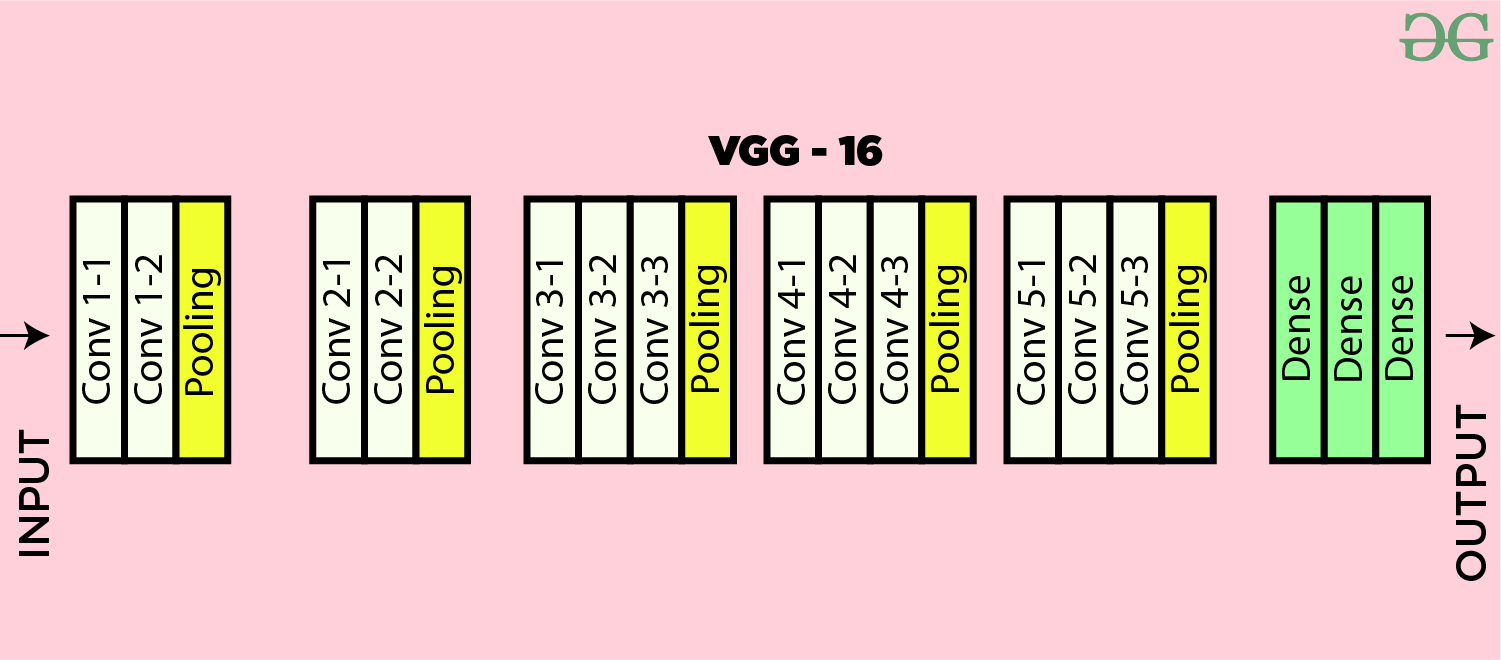

In [11]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D , Dropout , Flatten, Dense, BatchNormalization

In [12]:
model = Sequential()

# Layer1 Convolution layer
model.add(Conv2D(filters=32,kernel_size=(3,3),padding='same',input_shape=(32,32,3),activation='relu'))
model.add(Conv2D(filters=32,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.25))

# layer2 convolution
model.add(Conv2D(filters=64,kernel_size=(3,3),padding='same',activation='relu'))
model.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.25))

# layer 3 Flatten
model.add(Flatten())

# Dense Layers
model.add(Dense(512,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.50))

# output layer
model.add(Dense(10,activation='softmax'))

In [13]:
# Compile Model
model.compile(optimizer='Nadam',loss='categorical_crossentropy',metrics=['accuracy'])

In [14]:
# Fit the model
hist = model.fit(xtrain_scl,ytrain_cat,validation_split=0.2,epochs=20)

Epoch 1/20
1250/1250 [==============================] - 28s 10ms/step - loss: 1.6487 - accuracy: 0.4536 - val_loss: 1.1489 - val_accuracy: 0.5879
Epoch 2/20
1250/1250 [==============================] - 11s 9ms/step - loss: 1.1023 - accuracy: 0.6095 - val_loss: 1.0932 - val_accuracy: 0.6161
Epoch 3/20
1250/1250 [==============================] - 11s 9ms/step - loss: 0.9481 - accuracy: 0.6660 - val_loss: 1.0746 - val_accuracy: 0.6329
Epoch 4/20
1250/1250 [==============================] - 11s 9ms/step - loss: 0.8484 - accuracy: 0.6997 - val_loss: 0.8005 - val_accuracy: 0.7149
Epoch 5/20
1250/1250 [==============================] - 11s 9ms/step - loss: 0.7792 - accuracy: 0.7269 - val_loss: 0.6774 - val_accuracy: 0.7661
Epoch 6/20
1250/1250 [==============================] - 11s 9ms/step - loss: 0.7298 - accuracy: 0.7447 - val_loss: 0.7563 - val_accuracy: 0.7311
Epoch 7/20
1250/1250 [==============================] - 11s 9ms/step - loss: 0.6859 - accuracy: 0.7593 - val_loss: 0.6764 - val_a

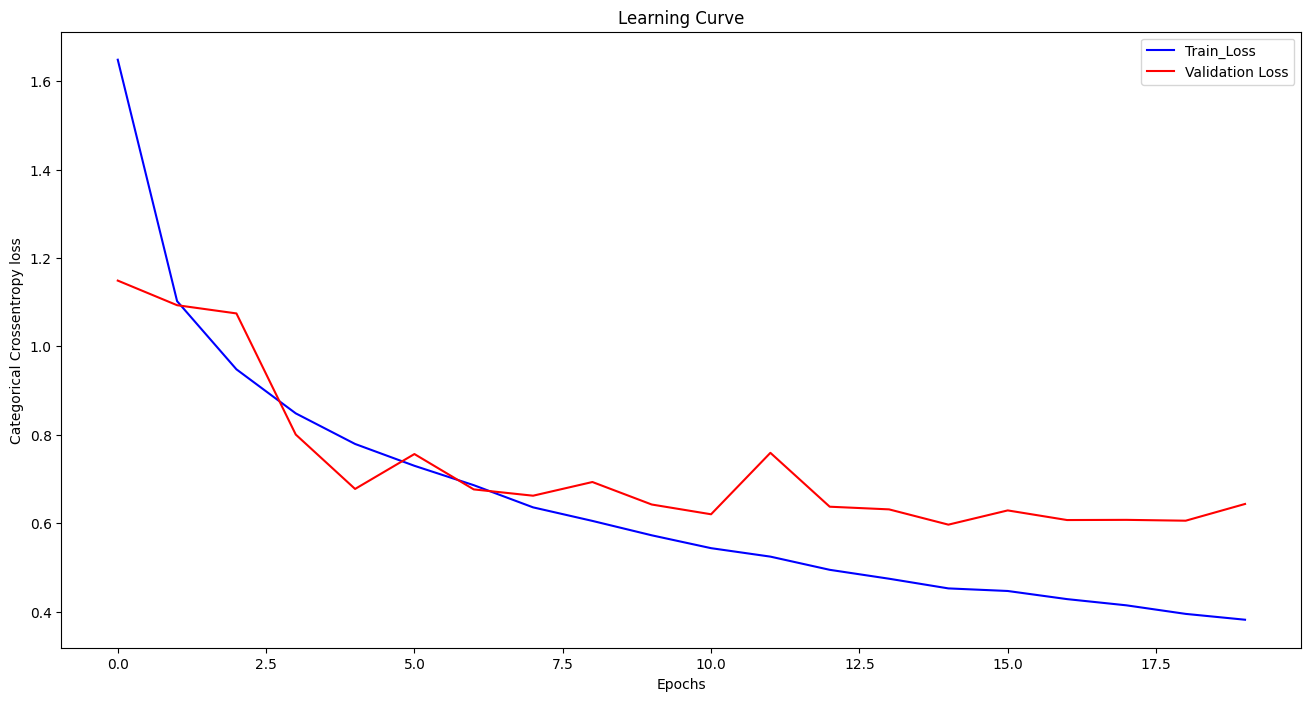

In [15]:
plt.figure(figsize=(16,8))
plt.plot(hist.history['loss'],label='Train_Loss',c='blue')
plt.plot(hist.history['val_loss'],label='Validation Loss',c='red')
plt.xlabel('Epochs')
plt.ylabel('Categorical Crossentropy loss')
plt.title('Learning Curve')
plt.legend()

 # Evaluate the model

In [16]:
model.evaluate(xtrain_scl,ytrain_cat)

1563/1563 [==============================] - 5s 3ms/step - loss: 0.2393 - accuracy: 0.9264


[0.2393389642238617, 0.926360011100769]

In [17]:
model.evaluate(xtest_scl,ytest_cat)

313/313 [==============================] - 1s 3ms/step - loss: 0.6356 - accuracy: 0.8041


[0.6356064677238464, 0.804099977016449]

## Predicting the labels

In [18]:
yprob_tr = model.predict(xtrain_scl)
yprob_ts = model.predict(xtest_scl)

313/313 [==============================] - 1s 2ms/step


In [19]:
yprob_tr[0]

array([9.0135809e-11, 1.5251947e-09, 1.8337151e-04, 2.8866304e-02,
       4.1401414e-05, 2.1438690e-02, 9.4946092e-01, 9.2254550e-06,
       1.0574076e-08, 5.9013883e-09], dtype=float32)

In [20]:
import numpy as np
ypred_tr = np.argmax(yprob_tr,axis=-1)
ypred_ts = np.argmax(yprob_ts,axis=-1)

In [21]:
ypred_tr[0:5]

array([6, 9, 9, 4, 1])

In [22]:
ytrain[0:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [23]:
ytest[0:5]

array([[3],
       [8],
       [8],
       [0],
       [6]], dtype=uint8)

# Confusion Matrix

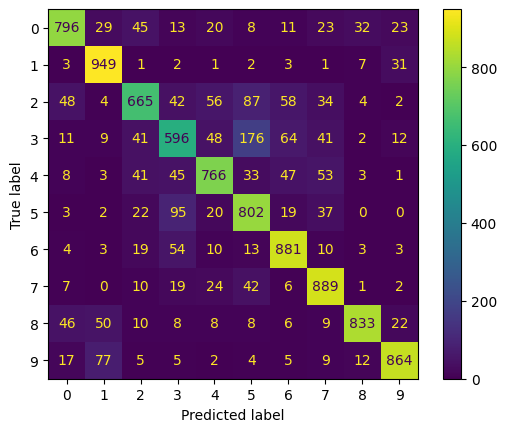

In [24]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
cf = confusion_matrix(ytest,ypred_ts)
cfd = ConfusionMatrixDisplay(cf)
cfd.plot()

# Classificatio Report

In [25]:
from sklearn.metrics import classification_report
print(classification_report(ytest,ypred_ts))

              precision    recall  f1-score   support

           0       0.84      0.80      0.82      1000
           1       0.84      0.95      0.89      1000
           2       0.77      0.67      0.72      1000
           3       0.68      0.60      0.63      1000
           4       0.80      0.77      0.78      1000
           5       0.68      0.80      0.74      1000
           6       0.80      0.88      0.84      1000
           7       0.80      0.89      0.84      1000
           8       0.93      0.83      0.88      1000
           9       0.90      0.86      0.88      1000

    accuracy                           0.80     10000
   macro avg       0.81      0.80      0.80     10000
weighted avg       0.81      0.80      0.80     10000

